**Discussing Iris data set in three different ways**


Hey there!I'm Parmida and today I'm gonna show you how to analyse one of the classical datasets in machine learning: iris data set.
this is a small data set but still a good place to start!
we're gonna analyse our small data set using decision trees and logistic regression and finally svm.we're gonna understand which one works better.
we're gonna use scikit-learn for implementing our models. so dun panic! it would be really easy!
so without further ado let's begin

***Dicision Trees***
So I assume that you know what is a decision tree. if u dun plz read on the internet. it's pretty easy and you may kinda use it unintentionally in your daily decision making!
So now we have to know more about iris data set so we load it. it is one of sklearn's built in data sets and some methods are available for it

In [46]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
iris=datasets.load_iris()
%matplotlib inline
import seaborn as sns

Now we wanna see what methods this data set includes?

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

ok! till now easy ..hah? now we're gonna use first method to describe our data

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

As you can see there are several features: sepal length, sepal width, petal length,petal width

As you know pandas dataframes are great for analysing and manipulating data, so we wanna covert our data set to a pandas dataframe so we use the following command:

In [11]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)

lets take a look at our dataframe :

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,versicolor
2,4.7,3.2,1.3,0.2,0,virginica
3,4.6,3.1,1.5,0.2,0,NaN
4,5.0,3.6,1.4,0.2,0,NaN


cool! now we're gonna take our first step for training our model. we split it into training and test set. we consider a 70/30 split

In [13]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3)

Now as you know, there is one thing that we want to predict and several things that we predict based on them. we call what we wanna predict 'y' and we call what we wanna use for prediction 'x'

now we want to split our train and test dataframes to x and y parts

In [63]:
x_train=df_train[iris.feature_names]
x_test=df_test[iris.feature_names]
y_train=df_train['target']
y_test=df_test['target']

Training time ! Don't panic it's the easiest part once you select your model. tnx sklearn

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we are gonna use our trained model to predict which spiecies each flower belongs to? ofcourse we use unseen data here.

In [18]:
y_test_pred=clf.predict(x_test)

Now one of the important things to know is that how much accurate is our model? is it satisfying or not ?

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9555555555555556

Now let's figure out which features were more important to us for this prediction?we creat a data frame and put important features there

In [20]:
pd.DataFrame({'feature_names':iris.feature_names,'feature_importance':clf.feature_importances_}).sort_values('feature_importance',ascending=False).set_index('feature_names')

,feature_importance
feature_names,
petal length (cm),0.902399
petal width (cm),0.076131
sepal width (cm),0.021469
sepal length (cm),0.000000


petal length was the most important one 

95% ! maybe is not that much brilliant but still good for such a simple model. later on we will see better models. But here one important thing is train and test sets distrubions .maybe i was lucky and test set was easy. so it's better to do it more times ,say 100 times. 

In [23]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)
x = df[iris.feature_names]
y = df['target']
cv_results = cross_validate(clf, x, y, cv=rs, scoring='accuracy')
accuracy_scores = pd.Series(cv_results['test_score'])

Now we splitted our data randomely 100 times and we trained a new classifier each time. now we have a list of acuuracy scores here. we can plot it using box plots. why box plots? coz box plots are good for showing distributions

Average Score: 0.946 [5th percentile: 0.889 & 95th percentile:1.0]


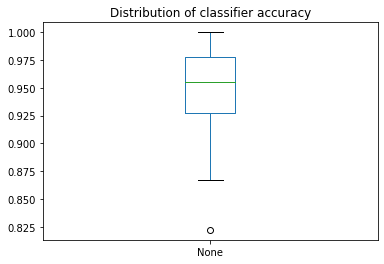

In [24]:
accuracy_scores.plot(title='Distribution of classifier accuracy',kind='box',)
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(accuracy_scores.mean(),accuracy_scores.quantile(.05),accuracy_scores.quantile(.95),))

**Tuning Hyper Parameters**

one hyperparameter that you should be aware of is depth of your tree. here we let the tree to grow as much as it wants. but now we wanna try it for different depths:

In [26]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
for max_depth in [1, 2, 3, 4]:
 # We initialize a new classifier each iteration with different
 clf = DecisionTreeClassifier(max_depth=max_depth)
 # We also initialize our shuffle splitter
 rs = ShuffleSplit(n_splits=20, test_size=0.25)
 cv_results = cross_validate(clf, x_train, y_train, cv=rs, scoring='accuracy')
 accuracy_scores = pd.Series(cv_results['test_score'])
 print(
 '@ max_depth = {}: accuracy_scores: {}'.format(
  max_depth,
  accuracy_scores.quantile(.1),
  accuracy_scores.quantile(.9)))


@ max_depth = 1: accuracy_scores: 0.5925925925925926
@ max_depth = 2: accuracy_scores: 0.8888888888888888
@ max_depth = 3: accuracy_scores: 0.8888888888888888
@ max_depth = 4: accuracy_scores: 0.8888888888888888


That's it for this method! let's move on to our second method:

**Iris dataset analysis using logistic regression**

Now we want to use a more accurate model for predicting iris species

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

This is testing time 

In [32]:
predictions=model.predict(x_test)

let's build a 95% confidence interval for this model using k fold cross-validation:(we used z-table here, maybe t-table was better but i guess it'ds fine too!)

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
num_folds = 6
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'],cv=num_folds, scoring=['accuracy'])
accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)
print('Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(num_folds,(accuracy_mean - 1.96 * accuracy_sterror),(accuracy_mean + 1.96 * accuracy_sterror),))

Logistic Regression: Accuracy (6-fold): 0.95 ~ 1.00


As you can see our confident interval here is much more bettar than it was with decision trees

In [38]:
# We need to fit the model again before getting its coefficients
clf.fit(df[iris.feature_names], df['target'])
# We use dictionary comprehension instead of a for-loop
df_coef = pd.DataFrame({f'Coef [Class {class_id}]': clf.coef_[class_id]for class_id in range(clf.coef_.shape[0])},index=iris.feature_names)
df_coef.loc['intercept', :] = clf.intercept_
print(df_coef)

                   Coef [Class 0]  Coef [Class 1]  Coef [Class 2]
sepal length (cm)       -0.423404        0.534192       -0.110788
sepal width (cm)         0.961736       -0.318006       -0.643730
petal length (cm)       -2.519557       -0.205387        2.724944
petal width (cm)        -1.085868       -0.939731        2.025599
intercept                9.881319        2.219315      -12.100634


A picture worth a thousand words! lets plot decision boundries

In [39]:
def plot_decision_boundary(clf, x, y, ax, title):
    
    cmap='Paired_r'
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

In [44]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

x_train = df_test[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


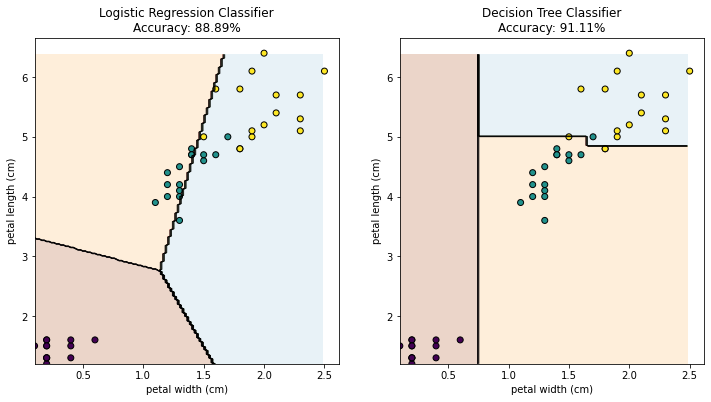

In [45]:
from sklearn.metrics import accuracy_score
    
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

two_features = ['petal width (cm)', 'petal length (cm)']


clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_lr.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_lr, df_test[two_features], df_test['target'], ax=axs[0], 
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy:.2%}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_dt.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_dt, df_test[two_features], df_test['target'], ax=axs[1], 
    title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}'
)

fig.show()

***NOTE***: The logistic regression did'nt perform well this time coz we used only two features this time

****Third Method:Support Vector Machines****
Support Vector Machines are really brilliant ! I first introduced to them when i was watching cs229 from stanford and i was like wow!
mathematics behind them is awesome and also they are way more powerful than above methods!

In [61]:
from sklearn.svm import SVC
model=SVC()

In [64]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
pred=model.predict(x_test)

Now we briefly evaluate our model.for this method i will introduce two new evaluation ways:

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  2 14]]


In [67]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.88      0.94      0.91        16
          2       0.93      0.88      0.90        16

avg / total       0.93      0.93      0.93        45

